# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" # YOUR CODE HERE

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city # YOUR CODE HERE
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        city_weather = response["weather"][0]['main']# YOUR CODE HERE

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = response['coord']['lat'] # YOUR CODE HERE
        city_lng = response['coord']['lon'] # YOUR CODE HERE
        city_max_temp = response['main']['temp_max'] - 273.15 # YOUR CODE HERE
        city_humidity = response['main']['humidity'] # YOUR CODE HERE
        city_clouds = response['clouds']['all'] # YOUR CODE HERE
        city_wind = response['wind']['speed'] # YOUR CODE HERE
        city_country = response['sys']['country'] # YOUR CODE HERE
        city_date = response['dt']# YOUR CODE HERE

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | margate
Processing Record 3 of Set 1 | san pedro pochutla
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | puerto ayora
Processing Record 6 of Set 1 | hisar
Processing Record 7 of Set 1 | san luis de la loma
Processing Record 8 of Set 1 | hermanus
Processing Record 9 of Set 1 | grytviken
Processing Record 10 of Set 1 | wailua homesteads
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | arteche
Processing Record 13 of Set 1 | okhotsk
Processing Record 14 of Set 1 | tofol
Processing Record 15 of Set 1 | selfoss
Processing Record 16 of Set 1 | blackmans bay
Processing Record 17 of Set 1 | bayanhongor
Processing Record 18 of Set 1 | udachny
Processing Record 19 of Set 1 | afaahiti
Processing Record 20 of Set 1 | georgetown
Processing Record 21 of Set 1 | luanda
Processing Record 22 of Set 1 | p

Processing Record 40 of Set 4 | gao
Processing Record 41 of Set 4 | fuvahmulah
City not found. Skipping...
Processing Record 42 of Set 4 | rio grande
Processing Record 43 of Set 4 | lensk
Processing Record 44 of Set 4 | santana do livramento
Processing Record 45 of Set 4 | port elizabeth
Processing Record 46 of Set 4 | gdov
Processing Record 47 of Set 4 | whakatane
Processing Record 48 of Set 4 | tura
Processing Record 49 of Set 4 | mazaricos
Processing Record 0 of Set 5 | ulaangom
Processing Record 1 of Set 5 | vorgashor
Processing Record 2 of Set 5 | cidreira
Processing Record 3 of Set 5 | ayame
Processing Record 4 of Set 5 | vorkuta
Processing Record 5 of Set 5 | yangchun
Processing Record 6 of Set 5 | mugia
Processing Record 7 of Set 5 | ola
Processing Record 8 of Set 5 | kyren
Processing Record 9 of Set 5 | cova figueira
Processing Record 10 of Set 5 | utrik
Processing Record 11 of Set 5 | malyye derbety
Processing Record 12 of Set 5 | qamdo
Processing Record 13 of Set 5 | geraldt

Processing Record 27 of Set 8 | lebanon
Processing Record 28 of Set 8 | sitka
Processing Record 29 of Set 8 | walvis bay
Processing Record 30 of Set 8 | jatiroto
Processing Record 31 of Set 8 | klyuchi
Processing Record 32 of Set 8 | gijang
Processing Record 33 of Set 8 | kidal
Processing Record 34 of Set 8 | bilibino
Processing Record 35 of Set 8 | kodinsk
Processing Record 36 of Set 8 | argo
Processing Record 37 of Set 8 | kurchatov
Processing Record 38 of Set 8 | ongjin
Processing Record 39 of Set 8 | trinidad
Processing Record 40 of Set 8 | portage la prairie
Processing Record 41 of Set 8 | sombrio
Processing Record 42 of Set 8 | ayancik
Processing Record 43 of Set 8 | fisterra
Processing Record 44 of Set 8 | tonekabon
Processing Record 45 of Set 8 | ariquemes
Processing Record 46 of Set 8 | nova vicosa
Processing Record 47 of Set 8 | aasiaat
Processing Record 48 of Set 8 | kangding
Processing Record 49 of Set 8 | tateyama
Processing Record 0 of Set 9 | novyy urengoy
Processing Rec

Processing Record 17 of Set 12 | sarikei
Processing Record 18 of Set 12 | san angelo
Processing Record 19 of Set 12 | homa bay
Processing Record 20 of Set 12 | san rafael del sur
Processing Record 21 of Set 12 | chibougamau
Processing Record 22 of Set 12 | ulsteinvik
Processing Record 23 of Set 12 | sao raimundo das mangabeiras
Processing Record 24 of Set 12 | morant bay
Processing Record 25 of Set 12 | nyandoma
Processing Record 26 of Set 12 | crane
Processing Record 27 of Set 12 | namibe
Processing Record 28 of Set 12 | villa gesell
Processing Record 29 of Set 12 | sangmelima
Processing Record 30 of Set 12 | pemba
Processing Record 31 of Set 12 | tobi village
City not found. Skipping...
Processing Record 32 of Set 12 | barcelos
Processing Record 33 of Set 12 | sungailiat
Processing Record 34 of Set 12 | ijevan
Processing Record 35 of Set 12 | maun
Processing Record 36 of Set 12 | pangody
Processing Record 37 of Set 12 | terebovlya
Processing Record 38 of Set 12 | mogadishu
Processing

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)# YOUR CODE HERE

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,-3.66,75,100,5.14,CA,1698612235
1,margate,51.3813,1.3862,11.84,88,83,1.79,GB,1698612407
2,san pedro pochutla,15.7333,-96.4667,29.69,64,31,2.97,MX,1698612407
3,adamstown,-25.0660,-130.1015,22.34,84,98,6.56,PN,1698612407
4,puerto ayora,-0.7393,-90.3518,29.98,87,41,3.58,EC,1698612408


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-3.66,75,100,5.14,CA,1698612235
1,margate,51.3813,1.3862,11.84,88,83,1.79,GB,1698612407
2,san pedro pochutla,15.7333,-96.4667,29.69,64,31,2.97,MX,1698612407
3,adamstown,-25.0660,-130.1015,22.34,84,98,6.56,PN,1698612407
4,puerto ayora,-0.7393,-90.3518,29.98,87,41,3.58,EC,1698612408


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

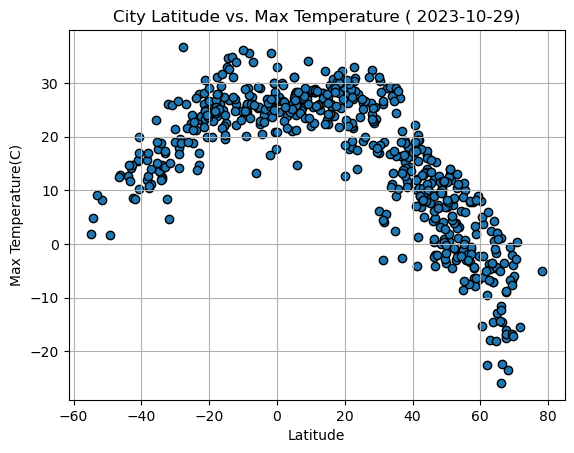

In [9]:
# Build scatter plot for latitude vs. temperature
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker='o',edgecolors='black' )

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")
plt.title(f"City Latitude vs. Max Temperature ( {pd.Timestamp('today'):%Y-%m-%d})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

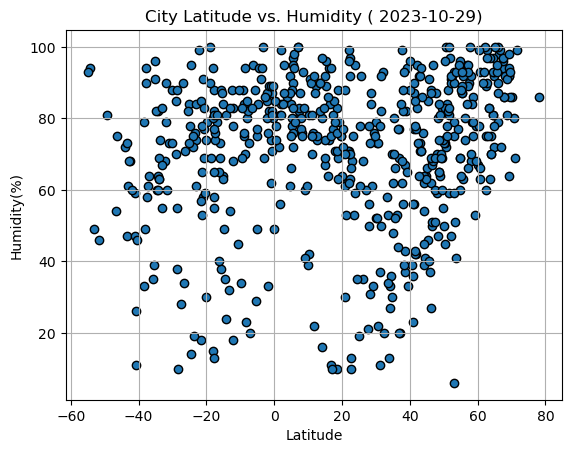

In [10]:
# Build the scatter plots for latitude vs. humidity
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker='o',edgecolors='black' )

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Humidity(%)")
plt.title(f"City Latitude vs. Humidity ( {pd.Timestamp('today'):%Y-%m-%d})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

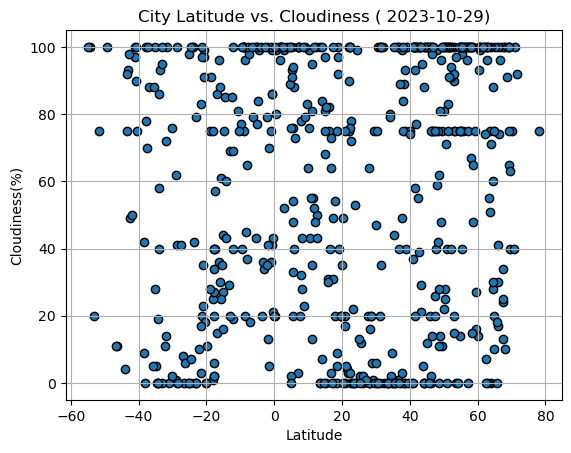

In [11]:
# Build the scatter plots for latitude vs. cloudiness
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker='o',edgecolors='black' )
# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Cloudiness(%)")
plt.title(f"City Latitude vs. Cloudiness ( {pd.Timestamp('today'):%Y-%m-%d})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

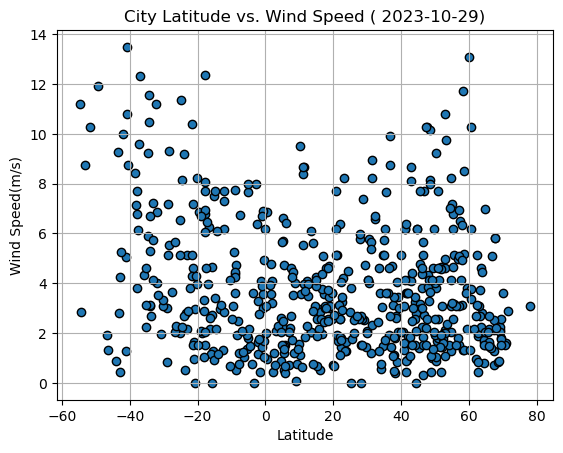

In [12]:
# Build the scatter plots for latitude vs. wind speed
# YOUR CODE HERE
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker='o',edgecolors='black' )

# Incorporate the other graph properties
# YOUR CODE HERE
plt.xlabel("Latitude")
plt.ylabel("Wind Speed(m/s)")
plt.title(f"City Latitude vs. Wind Speed ( {pd.Timestamp('today'):%Y-%m-%d})")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE
def line_eq(df,x_axis,y_axis):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(df[x_axis],df[y_axis])
    x_axis_values = [float(slope) * x_val for x_val in df[x_axis]]
    regress_values = [float(value) + intercept for value in x_axis_values]
    eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    return {'eq': eq, 'reg_values': regress_values, 'rvalue': rvalue, 'pvalue': pvalue,'stderr' : stderr}

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df['Lat']>=0]


# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,-3.66,75,100,5.14,CA,1698612235
1,margate,51.3813,1.3862,11.84,88,83,1.79,GB,1698612407
2,san pedro pochutla,15.7333,-96.4667,29.69,64,31,2.97,MX,1698612407
5,hisar,29.1667,75.7167,23.19,33,1,2.52,IN,1698612408
6,san luis de la loma,17.2706,-100.8939,29.05,77,31,3.56,MX,1698612408


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,adamstown,-25.0660,-130.1015,22.34,84,98,6.56,PN,1698612407
4,puerto ayora,-0.7393,-90.3518,29.98,87,41,3.58,EC,1698612408
7,hermanus,-34.4187,19.2345,13.57,64,0,11.54,ZA,1698612408
8,grytviken,-54.2811,-36.5092,4.78,94,100,2.83,GS,1698612408
10,edinburgh of the seven seas,-37.0676,-12.3116,11.11,64,88,12.31,SH,1698612409


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.873406510104474


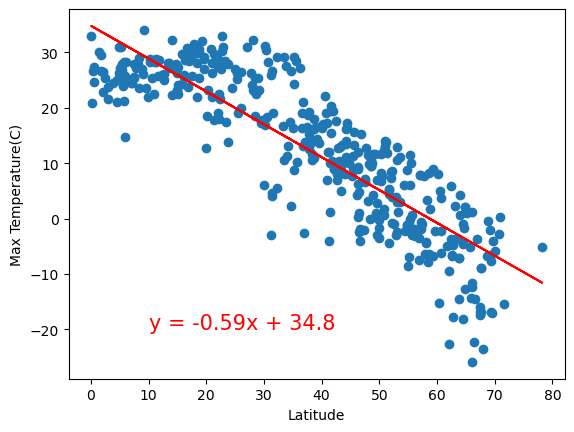

In [16]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE
reg_dic = line_eq(northern_hemi_df, 'Lat','Max Temp')
print(f"The r-value is: {reg_dic['rvalue']}")
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])
plt.plot(northern_hemi_df['Lat'],reg_dic['reg_values'],"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

plt.annotate(reg_dic['eq'],(10,-20),fontsize=15,color="red")

# # Show plot
plt.show()

The r-value is: 0.7301718001936248


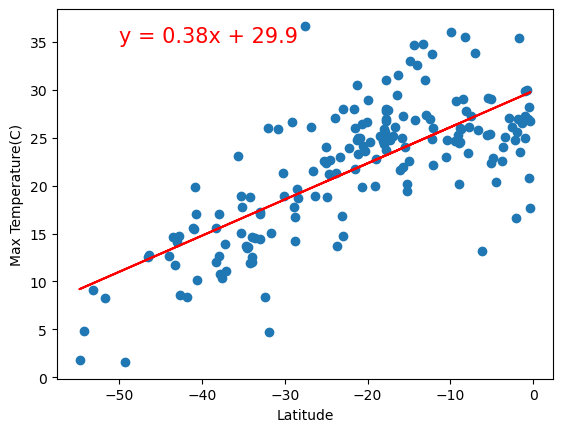

In [17]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE
reg_dic = line_eq(southern_hemi_df, 'Lat','Max Temp')
print(f"The r-value is: {reg_dic['rvalue']}")
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])
plt.plot(southern_hemi_df['Lat'],reg_dic['reg_values'],"r-")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature(C)")

plt.annotate(reg_dic['eq'],(-50,35),fontsize=15,color="red")

# #Show plot
plt.show()

**Discussion about the linear relationship:*From Equator to Tropics (+23 and -23) higher Maximum temperatures are recorded. 
As we go toward equator to North poles recorded Max Temperaatures drop.As we go toward South Pole to Equator recorded Max Temperaatures increse.*YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.13344031176522655


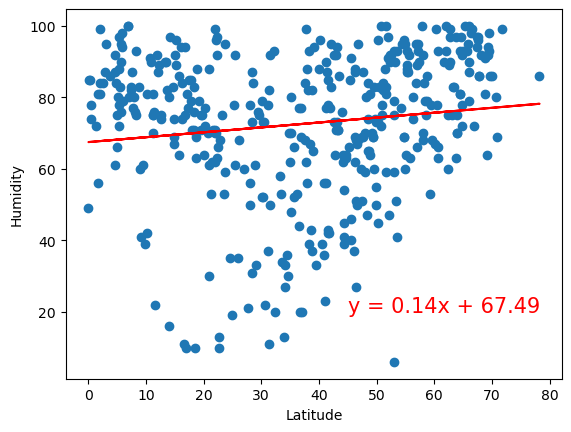

In [18]:
# Northern Hemisphere
# YOUR CODE HERE
reg_dic = line_eq(northern_hemi_df, 'Lat','Humidity')
print(f"The r-value is: {reg_dic['rvalue']}")
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])
plt.plot(northern_hemi_df['Lat'],reg_dic['reg_values'],"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.annotate(reg_dic['eq'],(45,20),fontsize=15,color="red")

# # Show plot
plt.show()

The r-value is: 0.1746847771044289


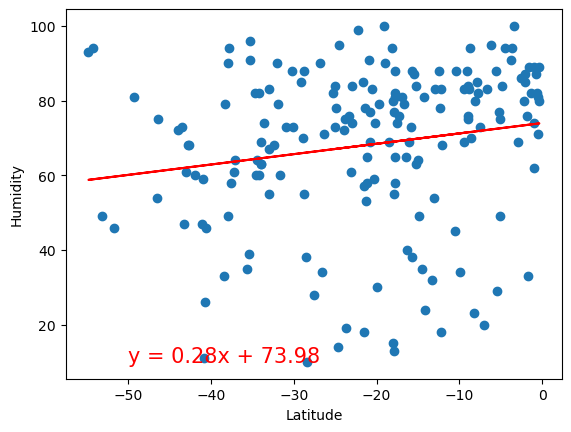

In [19]:
# Southern Hemisphere
# YOUR CODE HERE
reg_dic = line_eq(southern_hemi_df, 'Lat','Humidity')
print(f"The r-value is: {reg_dic['rvalue']}")
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])
plt.plot(southern_hemi_df['Lat'],reg_dic['reg_values'],"r-")

plt.xlabel("Latitude")
plt.ylabel("Humidity")

plt.annotate(reg_dic['eq'],(-50,10),fontsize=15,color="red")

# # Show plot
plt.show()

**Discussion about the linear relationship:*Humidity increases as we move from equator to North Pole.Humidity decreases as we move from South Pole to equator.*YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1098362474445877


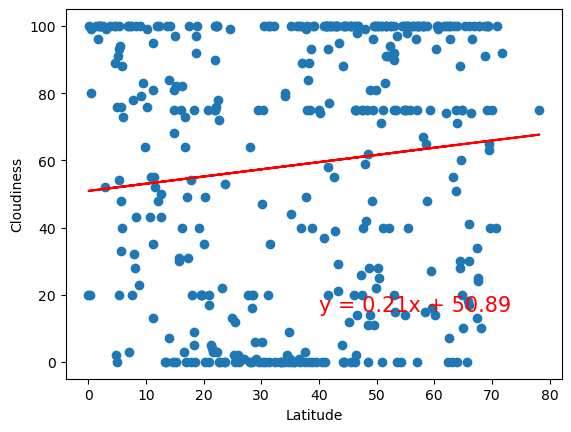

In [20]:
# Northern Hemisphere
# YOUR CODE HERE
reg_dic = line_eq(northern_hemi_df, 'Lat','Cloudiness')
print(f"The r-value is: {reg_dic['rvalue']}")
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])
plt.plot(northern_hemi_df['Lat'],reg_dic['reg_values'],"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.annotate(reg_dic['eq'],(40,15),fontsize=15,color="red")

# # Show plot
plt.show()

The r-value is: 0.07352495837859903


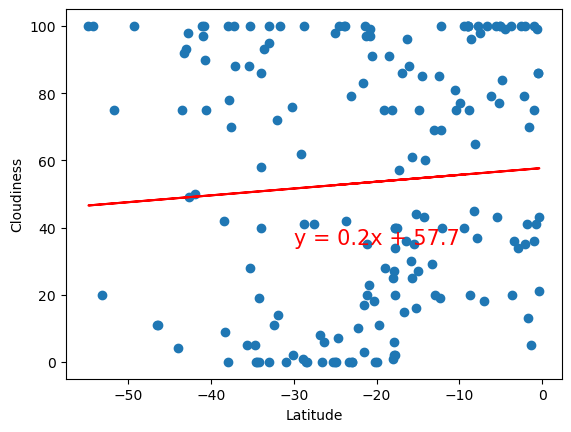

In [21]:
# Southern Hemisphere
# YOUR CODE HERE
reg_dic = line_eq(southern_hemi_df, 'Lat','Cloudiness')
print(f"The r-value is: {reg_dic['rvalue']}")
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])
plt.plot(southern_hemi_df['Lat'],reg_dic['reg_values'],"r-")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

plt.annotate(reg_dic['eq'],(-30,35),fontsize=15,color="red")

# # Show plot
plt.show()


**Discussion about the linear relationship:*From Equator to North Pole, coudiness increses moderately.From South Pole to Equator, coudiness decreses moderately.*YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.031114685655186103


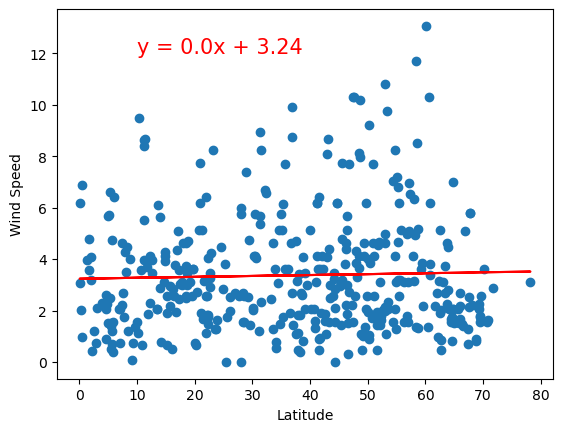

In [22]:
# Northern Hemisphere
# YOUR CODE HERE
reg_dic = line_eq(northern_hemi_df, 'Lat','Wind Speed')
print(f"The r-value is: {reg_dic['rvalue']}")
plt.scatter(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])
plt.plot(northern_hemi_df['Lat'],reg_dic['reg_values'],"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.annotate(reg_dic['eq'],(10,12),fontsize=15,color="red")

# # Show plot
plt.show()

The r-value is: -0.3662950796563697


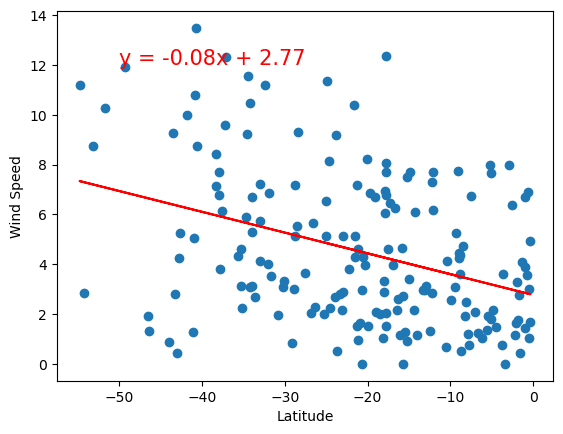

In [23]:
# Southern Hemisphere
# YOUR CODE HERE
reg_dic = line_eq(southern_hemi_df, 'Lat','Wind Speed')
print(f"The r-value is: {reg_dic['rvalue']}")
plt.scatter(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])
plt.plot(southern_hemi_df['Lat'],reg_dic['reg_values'],"r-")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

plt.annotate(reg_dic['eq'],(-50,12),fontsize=15,color="red")

# # Show plot
plt.show()

**Discussion about the linear relationship:*From Equator to North Pole, windspeed increses moderately.From South Pole to Equator, windspeed decreses moderately.*YOUR RESPONSE HERE

The r-value is: 0.031114685655186103


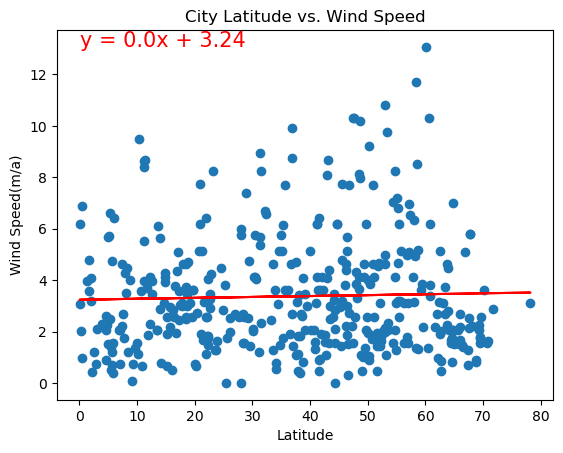

The r-value is: -0.3662950796563697


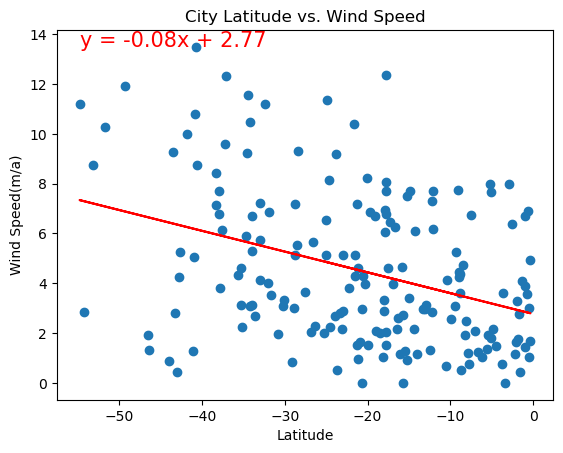

In [24]:
#OPTIONAL Function creation for plotting
def Linear_Reg_Plot(df,x,y,x_label,y_label,title):
    reg_dic = line_eq(df, x, y)
    print(f"The r-value is: {reg_dic['rvalue']}")
    plt.scatter(df[x],df[y])
    plt.plot(df[x],reg_dic['reg_values'],"r-")

    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{title}") 
    plt.annotate(str(reg_dic['eq']),(df[x].min(),df[y].max()),fontsize=15,color="red")

    # Show plot
    plt.show()
    
Linear_Reg_Plot(northern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed(m/a)','City Latitude vs. Wind Speed')
Linear_Reg_Plot(southern_hemi_df,'Lat','Wind Speed','Latitude','Wind Speed(m/a)','City Latitude vs. Wind Speed')